In [177]:
import scipy.io
from sklearn.manifold import Isomap, LocallyLinearEmbedding, MDS, SpectralEmbedding, TSNE
from sklearn.metrics.pairwise import pairwise_kernels
from sklearn.decomposition import PCA
from sklearn.datasets import make_swiss_roll, make_moons
import copy
import matplotlib.pyplot as plt

In [178]:
class Manifold:
    def __init__(self, x, y, data_name, kernel='rbf', n_components=2, n_neighbors=30) -> None:
        self.x              = x
        self.y              = y
        self.kernel         = kernel
        self.n_components   = n_components
        self.n_neighbors    = n_neighbors
        self.data_name      = data_name

    def __call__(self):
        x_kernel = self.compute_gram_matrix(self.x, kernel=self.kernel)

        data = {
            'x':self.x,
            'y':self.y,
            'pca':self.pca(x_kernel),
            'iso':self.isomap(x_kernel),
            'mds':self.mds(x_kernel),
            'lle':self.lle(x_kernel),
            'ltsa':self.ltsa(x_kernel),
            'tsne':self.T_SNE(x_kernel),
            'hessian':self.hessian(x_kernel),
            'modified':self.modified_lle(x_kernel),
            'spectral':self.spectralEmbedding(x_kernel),
        }

        scipy.io.savemat(f"{self.data_name}.mat", data)

        return data

    @staticmethod
    def compute_gram_matrix(X, kernel='rbf', **kwargs):
        return pairwise_kernels(X, metric=kernel, **kwargs)
    
    def pca(self, x):
        PCA(n_components=self.n_components)
        return pca.fit_transform(x)
    
    def isomap(self, x):
        embedding = Isomap(n_components=self.n_components, n_neighbors=self.n_neighbors)
        return embedding.fit_transform(x)
    
    def lle(self, x):
        lle = LocallyLinearEmbedding(n_components=self.n_components, n_neighbors=self.n_neighbors, method="standard")
        return lle.fit_transform(x)
    
    def ltsa(self, x):
        ltsa = LocallyLinearEmbedding(n_components=self.n_components, n_neighbors=self.n_neighbors, method="ltsa")
        return ltsa.fit_transform(x)
    
    def hessian(self, x):
        hessian = LocallyLinearEmbedding(n_components=self.n_components, n_neighbors=self.n_neighbors, method="hessian")
        return hessian.fit_transform(x)
    
    def modified_lle(self, x):
        modified = LocallyLinearEmbedding(n_components=self.n_components, n_neighbors=self.n_neighbors, method="modified")
        return modified.fit_transform(x)
    
    def mds(self, x):
        mds = MDS(n_components=self.n_components, n_init=4, max_iter=300)
        return mds.fit_transform(x)
    
    def spectralEmbedding(self, x):
        se = SpectralEmbedding(n_components=self.n_components, n_neighbors=self.n_neighbors)
        return se.fit_transform(x)
    
    def T_SNE(self, x):
        tsne = TSNE(n_components=self.n_components,  method='exact')
        return tsne.fit_transform(x) 

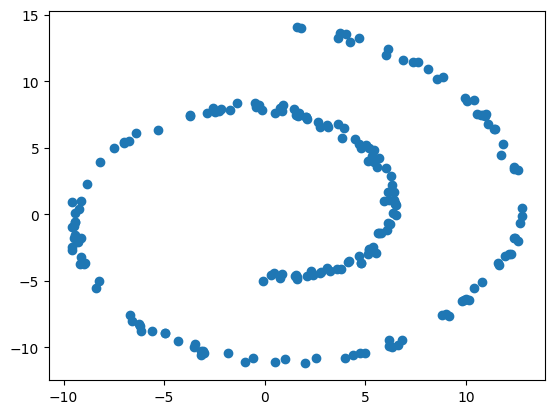

(200, 1) (200, 1)


In [179]:
x_, t = make_swiss_roll(n_samples=200, noise=0.2, random_state=42)
x = x_[:, 0:1]
y = x_[:, 2]
y = y.reshape(-1, 1)
plt.scatter(x,y)
plt.show()
print(x.shape, y.shape)


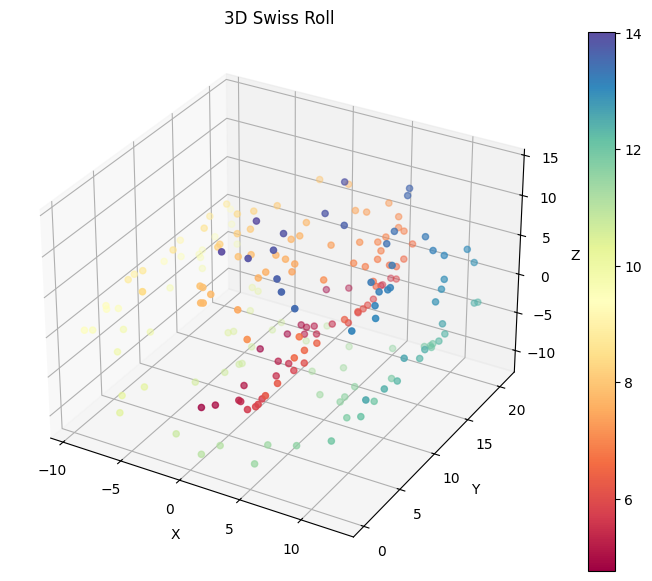

(200, 2) (200, 1)


g:\AI\MachineLearning\.venv\lib\site-packages\sklearn\manifold\_mds.py:626: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(


{'x': array([[-3.12117466, 13.48266457],
        [ 6.1251035 ,  1.76693926],
        [ 6.70581101,  3.394203  ],
        [-6.19171433, 18.86963796],
        [ 6.15172194, 12.73501025],
        [ 6.15135479,  0.19313808],
        [ 2.73768262,  2.1309024 ],
        [12.2639787 , 13.93353715],
        [-6.0113326 ,  0.10629326],
        [ 4.33129854,  3.37696908],
        [ 0.94590159, 11.52340958],
        [ 3.87632549, 14.52979915],
        [12.55753356, 13.69118645],
        [ 6.10119951,  4.7096555 ],
        [ 6.36058251, 14.95576365],
        [ 6.36095981,  4.98223084],
        [ 2.05226873,  6.83339366],
        [-9.39639866, 15.67631951],
        [-7.03774104, 13.64229088],
        [ 2.88211638, 17.83369162],
        [-5.1759108 , 13.80987074],
        [ 5.8305192 , 11.93448067],
        [ 2.82593196,  1.96717012],
        [-2.50088637,  7.72203186],
        [-8.24939976,  5.56924972],
        [10.88617953,  5.12378251],
        [ 6.27775894, 20.43322165],
        [-9.47304273,  

In [180]:
x_, t = make_swiss_roll(n_samples=200, noise=0, random_state=42)
x = x_[:, 0:2]
y = x_[:, 2]
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(x[:,0], x[:,1], y, c=t, cmap=plt.cm.Spectral)
plt.colorbar(sc)
ax.set_title('3D Swiss Roll')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()
y = y.reshape(-1, 1)
print(x.shape, y.shape)

manifold = Manifold(x=x, y=y, data_name='swiss_roll', n_components=5)
manifold()